In [1]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## 1. "Διάβασμα" Dataset

In [2]:
# Δημιουργία dataframe διαβάζοντας τo csv που δόθηκε.

# Τοποθετήστε το δικό σας path 

df = pd.read_csv("nasdaq2007_17.csv", '\t', header=None)

In [3]:
# Προετοιμασία δεδομένων για επεξεργασία 

df_2 = df.iloc[:,0]

df = df.transpose()
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header

In [4]:
# Χωρισμος σε train και test
train_size = int(len(df) * 0.80)

test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [5]:
# Προεπεξεργασία 
scaler = StandardScaler()

n = 359
for j in range(0,n):

    scaler = scaler.fit(train[[df_2[j]]])

    train[df_2[j]] = scaler.transform(train[[df_2[j]]])

    test[df_2[j]] = scaler.transform(test[[df_2[j]]])

<ipython-input-5-f29b68bd4c74>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[df_2[j]] = scaler.transform(train[[df_2[j]]])
<ipython-input-5-f29b68bd4c74>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[df_2[j]] = scaler.transform(test[[df_2[j]]])
<ipython-input-5-f29b68bd4c74>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [6]:
# Συναρτηση Προεπεξεργασία
def create_dataset(X, y, time_steps=1):

    Xs, ys = [], []

    for i in range(len(X) - time_steps):

        v = X.iloc[i:(i + time_steps)].values

        Xs.append(v)

        ys.append(y.iloc[i + time_steps])

    return np.array(Xs), np.array(ys)

In [7]:
# Προεπεξεργασία 
TIME_STEPS = 30

X_train, y_train = create_dataset(

   train.iloc[:,[0]],

   train[df_2[0]],

   TIME_STEPS

)

X_train_set = X_train
y_train_set = y_train

for j in range(1,n ):

  X_train, y_train = create_dataset(

  train.iloc[:,[j]],

  train[df_2[j]],

  TIME_STEPS

  )
  X_train_set = np.concatenate((X_train_set,X_train),axis=0)
  y_train_set = np.concatenate((y_train_set,y_train),axis=0)

In [8]:
#Δημιουργια μοντελου 
model = keras.Sequential()

model.add(keras.layers.LSTM(

    units=64,

    #input_shape=(X_train.shape[1], X_train.shape[2])
    input_shape=(X_train_set.shape[1], X_train_set.shape[2])

))

model.add(keras.layers.Dropout(rate=0.2))

#model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.RepeatVector(n=X_train_set.shape[1]))

model.add(keras.layers.LSTM(units=64, return_sequences=True))

model.add(keras.layers.Dropout(rate=0.2))

model.add(

  keras.layers.TimeDistributed(

    #keras.layers.Dense(units=X_train.shape[2])
    keras.layers.Dense(units=X_train_set.shape[2])

  )

)

model.compile(loss='mae', optimizer='adam')

In [9]:
#Εκπαιδευση του μοντελου 
history = model.fit(

    X_train_set, y_train_set,

    epochs= 1,

    batch_size=64,

    validation_split=0.1,

    shuffle=False

)

14590/14590 [==============================] - 263s 18ms/step - loss: 0.2075 - val_loss: 0.1811


In [10]:
#Αποθηκευση του μοντελου
path ='myModel_B_359'
model.save(path)

INFO:tensorflow:Assets written to: myModel_B_d\assets


INFO:tensorflow:Assets written to: myModel_B_d\assets


In [11]:
path ='myModel_B_359'
model = keras.models.load_model(path)

Time series: 0


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


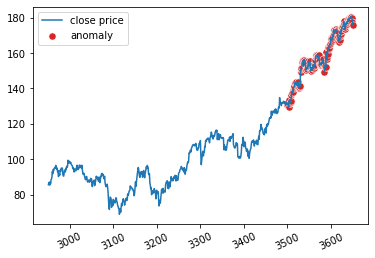

Time series: 1


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


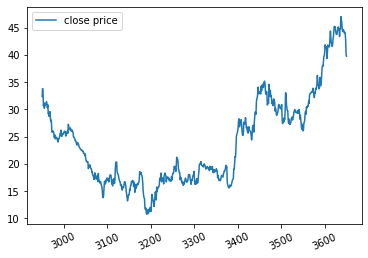

Time series: 2


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


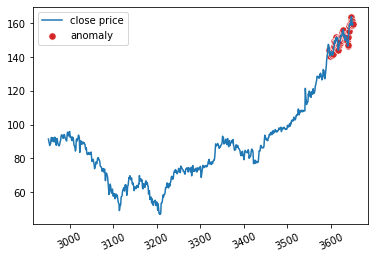

Time series: 3


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


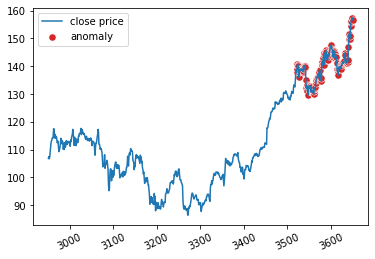

Time series: 4


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


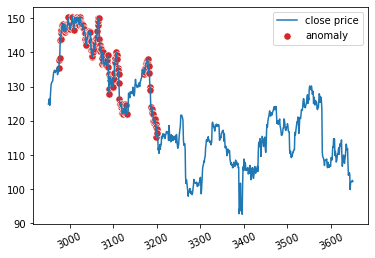

Time series: 5


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


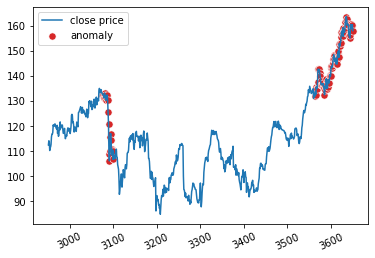

Time series: 6


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


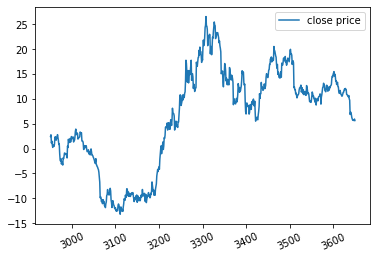

Time series: 7


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


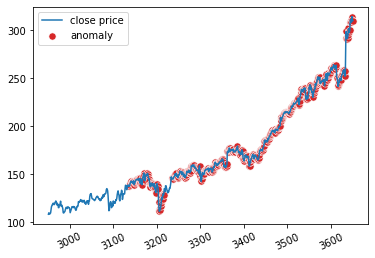

Time series: 8


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


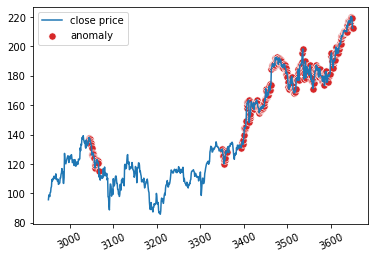

Time series: 9


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


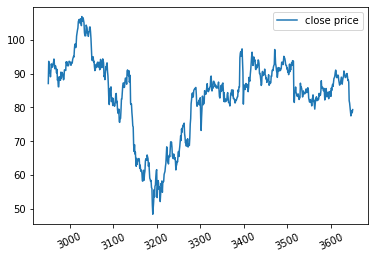

Time series: 10


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


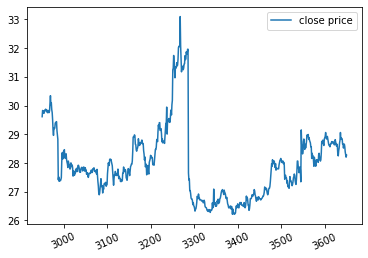

Time series: 11


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


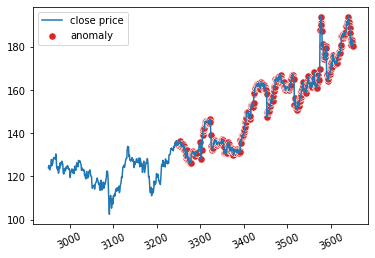

Time series: 12


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


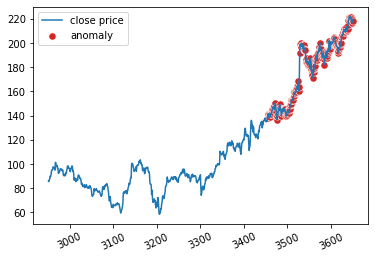

Time series: 13


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


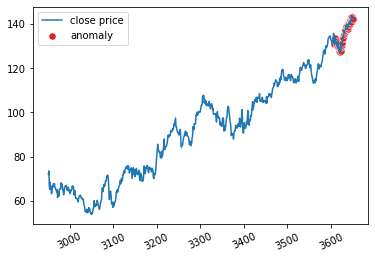

Time series: 14


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


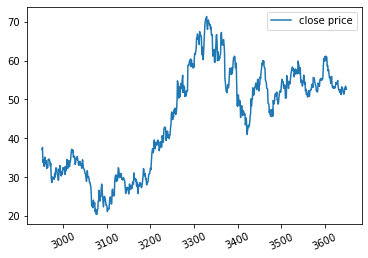

Time series: 15


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


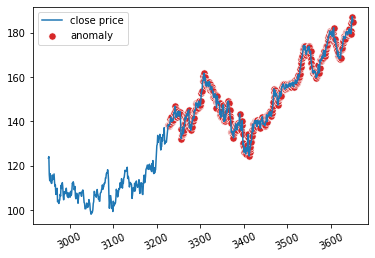

Time series: 16


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


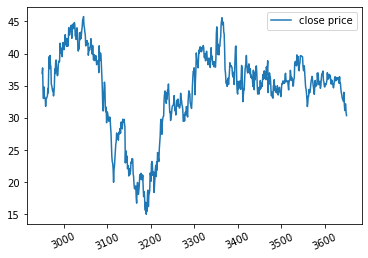

Time series: 17


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


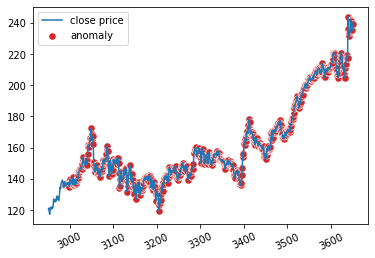

Time series: 18


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


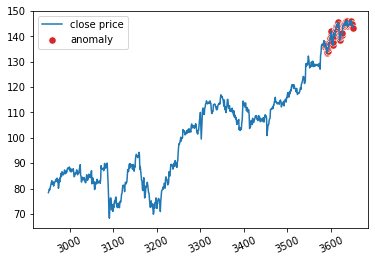

Time series: 19


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


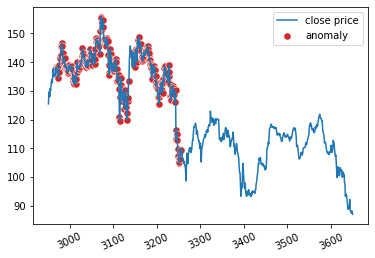

In [12]:
#Εκτελεση του πειραματος
THRESHOLD = 0.65

k = 20

for j in range(0,k):

  anomalies = 0
  X_test, y_test = create_dataset(

    test.iloc[:,[j]],

    test[df_2[j]],

    TIME_STEPS

  )

  X_train, y_train = create_dataset(

   train.iloc[:,[j]],

   train[df_2[j]],

   TIME_STEPS

)

  X_train_pred = model.predict(X_train)

  train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

  X_test_pred = model.predict(X_test)

  test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

  test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)

  test_score_df['loss'] = test_mae_loss

  test_score_df['threshold'] = THRESHOLD

  test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

  #test_score_df['a'] = test[TIME_STEPS:].a  #[df_2[j]]
  test_score_df[df_2[j]] = test[TIME_STEPS:][df_2[j]]

  anomalies = test_score_df[test_score_df.anomaly == True]

  print("Time series:", j)
  plt.plot(
      test[TIME_STEPS:].index, 
    scaler.inverse_transform(test[TIME_STEPS:][df_2[j]]), 
    label='close price'
  )

  sns.scatterplot(  anomalies.index,
    scaler.inverse_transform(anomalies[df_2[j]]),
    color=sns.color_palette()[3],
    s=52,
    label='anomaly')

  plt.xticks(rotation=25)
  plt.legend()
  plt.show()